# Lorentz lineshape

<i>© Von P. Walden, Washington State University</i>

This notebook calculates the Lorentz lineshape and its dependency on pressure and temperature. It follows section 3.4 in *Satellite Meteorology* by Kidder and Vonder Haar.

1. rd_lnfl.py is a function to read the HITRAN database and is saved in /Users/vonw/work/software/lnfl/rd_lnfl.py.

2. Explanations for the columns in the HITRAN database files (2004-2012) can be found at: https://hitran.org/docs/definitions-and-units/

3. Constants used by HITRAN: h = 6.62606957 × 10^(−27) ergs , c = 2.99792458 × 10^(10) cm s−1, k = 1.3806488 × 10^(−16) erg K−1, c2 = 1.4387770 cm K.

In [2]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [3]:
# From the HITRAN 2012 database for CO2 between 650 and 850 cm-1 (about 12-15 um).
# ....Calculations from https://hitran.org/docs/definitions-and-units/
Pref = 1.    # atm
Tref = 296.0 # Kelvin
hitran = pd.DataFrame({'Vij':   [667.400517, 700.008330, 750.017090, 800.004796, 850.018520],
                       'Sij':   [1.300e-19,  1.350e-29,  5.050e-31,  2.750e-26,  9.040e-30 ],
                       'Gair':  [0.0863,     0.0663,     0.0612,     0.0643,     0.0630    ],
                       'Gself': [0.1190,     0.0750,     0.0630,     0.0680,     0.0650    ],
                       'Nair':  [0.74,       0.77,       0.68,       0.73,       0.71      ],
                       'Pshift':[-0.000431,  -0.000895,  -0.000846,  -0.000998,  -0.001103 ]})

In [4]:
# Set the atmospheric temperature and pressure, then determine the partial pressure of CO2.
P = 0.7                    # atm (about 700 mb; lower troposphere)
T = 260.                   # Kelvin (just a guess of T at 700 mb)
Pself = P * 0.00004        # Assuming CO2 is 400 ppm in the atmosphere

In [5]:
# Temperature and pressure dependenc of the line width
hitran['G'] = (Tref/T)**(hitran.Nair) * (hitran.Gair*(P-Pself) + hitran.Gself*Pself)

In [6]:
# Pressure shift correction of line position
hitran['vij'] = hitran.Vij + hitran.Pshift*P

In [7]:
hitran

,Vij,Sij,Gair,Gself,Nair,Pshift,G,vij
0,667.400517,1.300000e-19,0.0863,0.119,0.74,-0.000431,0.066495,667.400215
1,700.008330,1.350000e-29,0.0663,0.075,0.77,-0.000895,0.051284,700.007704
2,750.017090,5.050000e-31,0.0612,0.063,0.68,-0.000846,0.046789,750.016498
3,800.004796,2.750000e-26,0.0643,0.068,0.73,-0.000998,0.049479,800.004097
4,850.018520,9.040000e-30,0.0630,0.065,0.71,-0.001103,0.048353,850.017748


## Absorption near band center at 667 cm-1

Absorption Coefficient is:  1.2447713729049854e-23  m2


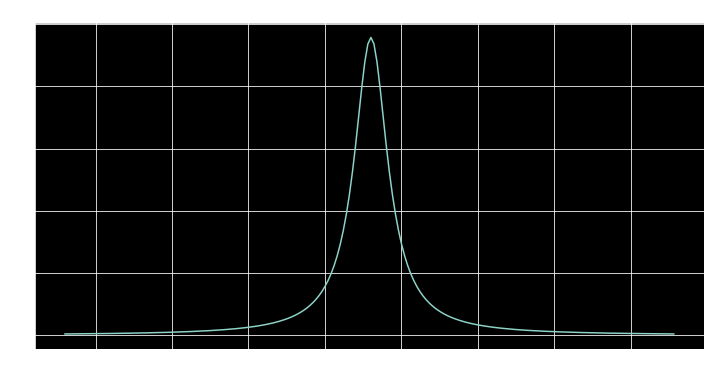

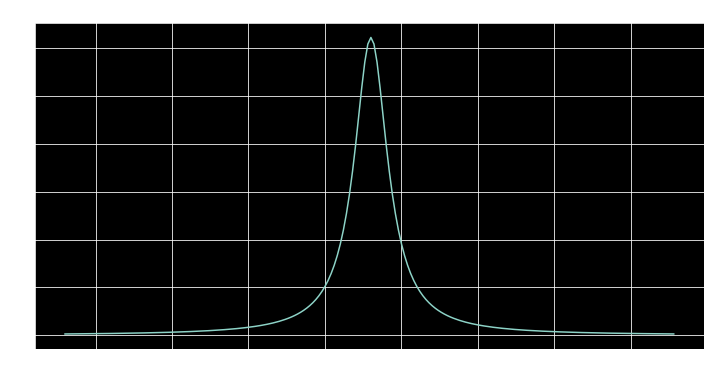

In [8]:
# Calculate the Lorentz line profile about the line position at 667 cm-1
line = 0
dwn = 1.
wn  = np.arange(hitran.iloc[line].vij-dwn, hitran.iloc[line].vij+dwn, 0.01)
fL  = (1./np.pi) * hitran.iloc[line].G / (hitran.iloc[line].G**2 + (wn - hitran.iloc[line].vij)**2)

figure(figsize=(12,6))
plot(wn,fL)
grid()
xlabel('Wavenumber')
ylabel('Lorentz Line Profile')
title('Carbon Dioxide at ' + str(hitran.iloc[line].vij) + ' cm-1')

figure(figsize=(12,6))
plot(wn,hitran.iloc[line].Sij * fL / 1e4)
grid()
xlabel('Wavenumber')
ylabel('Absorption (m2)')
title('Absorption line of Carbon Dioxide at ' + str(hitran.iloc[line].vij) + ' cm-1')

k = np.trapz(hitran.iloc[line].Sij * fL / 1e4, wn)
print('Absorption Coefficient is: ', k, ' m2')

## Absorption at 700 cm-1

Absorption Coefficient is:  1.3057407684890293e-33  m2


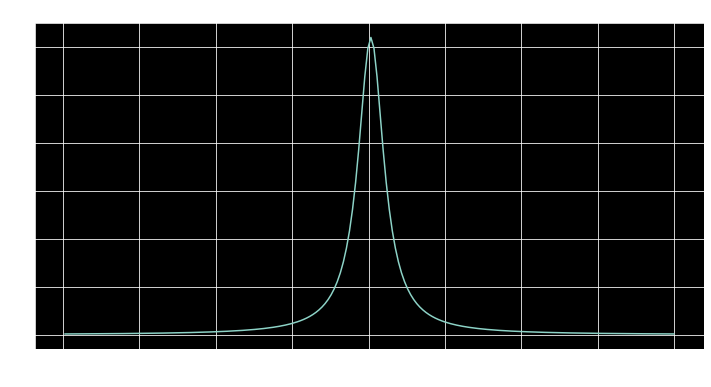

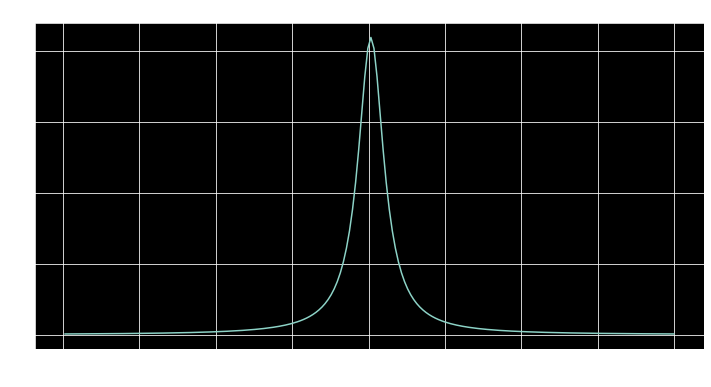

In [9]:
# Calculate the Lorentz line profile about the line position at 667 cm-1
line = 1
dwn = 1.
wn  = np.arange(hitran.iloc[line].vij-dwn, hitran.iloc[line].vij+dwn, 0.01)
fL  = (1./np.pi) * hitran.iloc[line].G / (hitran.iloc[line].G**2 + (wn - hitran.iloc[line].vij)**2)

figure(figsize=(12,6))
plot(wn,fL)
grid()
xlabel('Wavenumber')
ylabel('Lorentz Line Profile')
title('Carbon Dioxide at ' + str(hitran.iloc[line].vij) + ' cm-1')

figure(figsize=(12,6))
plot(wn,hitran.iloc[line].Sij * fL / 1e4)
grid()
xlabel('Wavenumber')
ylabel('Absorption (m2)')
title('Absorption line of Carbon Dioxide at ' + str(hitran.iloc[line].vij) + ' cm-1')

k = np.trapz(hitran.iloc[line].Sij * fL / 1e4, wn)
print('Absorption Coefficient is: ', k, ' m2')

## Absorption at 800 cm-1

Absorption Coefficient is:  2.6630093135455274e-30  m2


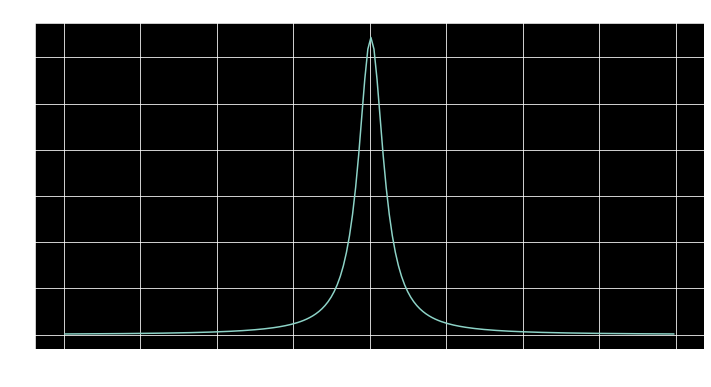

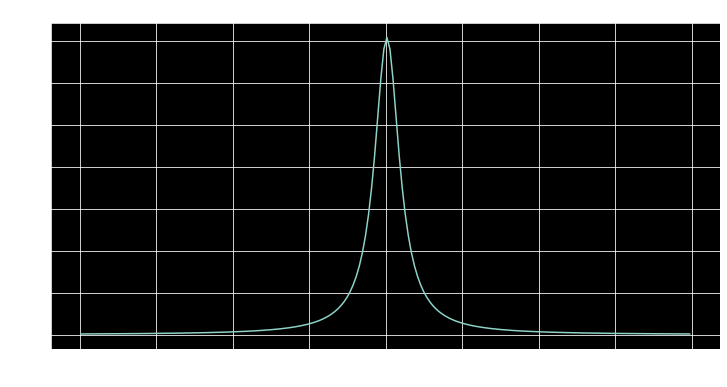

In [10]:
# Calculate the Lorentz line profile about the line position at 667 cm-1
line = 3
dwn = 1.
wn  = np.arange(hitran.iloc[line].vij-dwn, hitran.iloc[line].vij+dwn, 0.01)
fL  = (1./np.pi) * hitran.iloc[line].G / (hitran.iloc[line].G**2 + (wn - hitran.iloc[line].vij)**2)

figure(figsize=(12,6))
plot(wn,fL)
grid()
xlabel('Wavenumber')
ylabel('Lorentz Line Profile')
title('Carbon Dioxide at ' + str(hitran.iloc[line].vij) + ' cm-1')

figure(figsize=(12,6))
plot(wn,hitran.iloc[line].Sij * fL / 1e4)
grid()
xlabel('Wavenumber')
ylabel('Absorption (m2)')
title('Absorption line of Carbon Dioxide at ' + str(hitran.iloc[line].vij) + ' cm-1')

k = np.trapz(hitran.iloc[line].Sij * fL / 1e4, wn)
print('Absorption Coefficient is: ', k, ' m2')